**Exercise 1: (5 points) Why feature scaling is important for the k-means algorithm? Be specific.**

Feature scaling is an important step before applying k-means because the algorithm relies on Euclidean distance, and the Euclidean distance is highly affected when the input variables are in different ranges. The variables must be on the same scale to ensure that all features recieve equal weighting in the clustering analysis.

**Exercise 2: (5 points) How can clustering be used to improve the performance of a linear model?**
- **(a) Creating different models for different cluster groups.**
- **(b) Creating an input feature for cluster ids as dummy variables.**
- **(c) Creating an input feature for cluster centroids as a continuous variable.**
- **(d) Creating an input feature for cluster size as a continuous variable.**
- **(e) All of the above.**
- **(f) None of the above.**

(e) All of the above

**Exercise 3: (5 points) What are the risks of initial random cluster centroids assignments in k-means? Be specific.**

Randomly assigning cluster centroids risks a suboptimal solution and a slow convergence speed. For that reason, it is better to use k-means++ because it offers an improved method for cluster centroid selection that is proven to increase the effectiveness of the model.

**Exercise 4: Consider the Mall Customers.csv data file. This file contains the basic information (ID, age, gender, income, spending score) about a mall customers in the US. In Python, answer the following:**

(a) (5 points) Using the pandas library, read the csv data file and create a data-frame called customers. Remove the observations with missing values (if there is missing values).

In [5]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'craig-shaffer-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Mall_Customers.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading the datafile
customers = pd.read_csv(file_content_stream)
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#dropping observations w/ missing values
customers= customers.dropna()

(b) (8 points) Using the appropriate Python commands, put Gender, Age and Annual Income (k$) in the same scale.

In [7]:
#change Gender Male/Female to 1/0
customers['Gender'].replace(['Male', 'Female'], [1,0], inplace= True)

#scale the data
scaler=MinMaxScaler()
customers[['Age_01', 'Annual_Income_01']] = scaler.fit_transform(customers[['Age', 'Annual Income (k$)']])
customers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_01,Annual_Income_01
0,1,1,19,15,39,0.019231,0.000000
1,2,1,21,15,81,0.057692,0.000000
2,3,0,20,16,6,0.038462,0.008197
3,4,0,23,16,77,0.096154,0.008197
4,5,0,31,17,40,0.250000,0.016393
5,6,0,22,17,76,0.076923,0.016393
6,7,0,35,18,6,0.326923,0.024590
7,8,0,23,18,94,0.096154,0.024590
8,9,1,64,19,3,0.884615,0.032787
9,10,0,30,19,72,0.230769,0.032787


(c) (30 points) Because you are not familiar enough with buying patterns in malls, estimate the number of clusters for this dataset using the Calinski-Harabasz, Davies-Bouldin, and Silhouette scores. Do the following:
- Using Gender, Age and Annual Income (k$) cluster that data into clusters (k = 2, 3, . . . , 9, 10). Use n_init = 20.
- For each clustering results, compute the Calinski-Harabasz, Davies-Bouldin, and Silhouette scores.
- Visualize the Calinski-Harabasz, Davies-Bouldin, and Silhouette scores.
- Estimate the number of clusters.

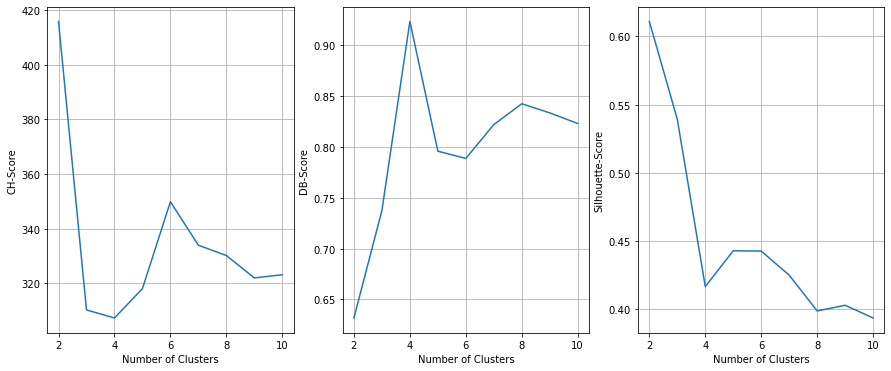

In [15]:
#defining the input data
x = customers[['Gender', 'Age_01', 'Annual_Income_01']]

#defining list of clusters to consider
num_clust = [2, 3, 4, 5, 6, 7, 8, 9, 10]

#defining empty lists to store scores
ch_score = []
db_score = []
sil_score = []

for i in num_clust:
    
    #fitting the k-means model
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(x)
    
    #computing and storing the Calinski-Harabasz score
    ch_score.append(calinski_harabasz_score(x, kmeans_md.labels_))
    
    #computing and storing the Davies-Bouldin score
    db_score.append(davies_bouldin_score(x, kmeans_md.labels_))
    
    #computing and storing the Silhouette score
    sil_score.append(silhouette_score(x, kmeans_md.labels_))

#visualizing the Calinski-Harabasz, Davies-Bouldin, and Silhouette scores
fig, axs = plt.subplots(1, 3, figsize = (15, 6))
axs[0].plot(num_clust, ch_score)
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('CH-Score')
axs[0].grid()

axs[1].plot(num_clust, db_score)
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('DB-Score')
axs[1].grid()

axs[2].plot(num_clust, sil_score)
axs[2].set_xlabel('Number of Clusters')
axs[2].set_ylabel('Silhouette-Score')
axs[2].grid()

The CH-Score and Silhouette-Score indicate that two clusters in the optimal number of clusters. Therefore, we will use two clusters.

(d) (8 points) Using the results from part (c), cluster the data into that number of clusters (use n_init = 20).

In [16]:
#clustering the data
kmeans_md = KMeans(n_clusters = 2, n_init = 20).fit(x)

#appending cluster labels
customers['Cluster'] = kmeans_md.labels_
customers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_01,Annual_Income_01,Cluster
0,1,1,19,15,39,0.019231,0.000000,1
1,2,1,21,15,81,0.057692,0.000000,1
2,3,0,20,16,6,0.038462,0.008197,0
3,4,0,23,16,77,0.096154,0.008197,0
4,5,0,31,17,40,0.250000,0.016393,0
5,6,0,22,17,76,0.076923,0.016393,0
6,7,0,35,18,6,0.326923,0.024590,0
7,8,0,23,18,94,0.096154,0.024590,0
8,9,1,64,19,3,0.884615,0.032787,1
9,10,0,30,19,72,0.230769,0.032787,0


(e) (7 points) Describe each of the clusters. Does the clustering results make sense? if not,
suggest how would improve this analysis.

In [17]:
#Cluster 0
cluster_0 = customers[customers['Cluster']==0]
cluster_0.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_01,Annual_Income_01,Cluster
count,112.000000,112.0,112.000000,112.000000,112.000000,112.000000,112.000000,112.0
mean,97.562500,0.0,38.098214,59.250000,51.526786,0.386504,0.362705,0.0
std,58.276412,0.0,12.644095,26.011952,24.114950,0.243156,0.213213,0.0
min,3.000000,0.0,18.000000,16.000000,5.000000,0.000000,0.008197,0.0
25%,46.750000,0.0,29.000000,39.750000,35.000000,0.211538,0.202869,0.0
50%,94.500000,0.0,35.000000,60.000000,50.000000,0.326923,0.368852,0.0
75%,148.250000,0.0,47.500000,77.250000,73.000000,0.567308,0.510246,0.0
max,197.000000,0.0,68.000000,126.000000,99.000000,0.961538,0.909836,0.0


In [18]:
#Cluster 1
cluster_1 = customers[customers['Cluster']==1]
cluster_1.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_01,Annual_Income_01,Cluster
count,88.000000,88.0,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,104.238636,1.0,39.806818,62.227273,48.511364,0.419362,0.387109,1.0
std,57.483830,0.0,15.514812,26.638373,27.896770,0.298362,0.218347,0.0
min,1.000000,1.0,18.000000,15.000000,1.000000,0.000000,0.000000,1.0
25%,59.500000,1.0,27.750000,45.500000,24.500000,0.187500,0.250000,1.0
50%,106.500000,1.0,37.000000,62.500000,50.000000,0.365385,0.389344,1.0
75%,151.250000,1.0,50.500000,78.000000,70.000000,0.625000,0.516393,1.0
max,200.000000,1.0,70.000000,137.000000,97.000000,1.000000,1.000000,1.0


Customers in cluster 0 are women. The average age is ~38, the avg annual income is ~59000, the avg spending score is ~51.5. However the range for these variables are very wide.

Customers in cluster 1 are men. The average age is ~40, the avg annual income is ~62000, the avg spending score is ~48.5. However the range for these variables are very wide.

Ultimately, the clusters were split entirely based on the customers gender. It makes sense because it perfectly split the two genders presented in the data set. Though outside of gender, the differences in groups are not very obvious (especially when considering range and averages). To improve analysis, I would say we'd have to consider more clusters to get more defining features for the customer clusters (outside of gender). 